In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
# implemented function
def get_affine_transform(in_points, out_points):
    in_points = np.vstack((in_points.T, np.ones(3)))
    out_points = out_points.T
    M = out_points @ np.linalg.pinv(in_points) 
    return M

In [3]:
def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg


In [4]:
(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

In [5]:
# own implementation
M = get_affine_transform(pts1, pts2)
dst = cv2.warpAffine(img,M,(c,r))

In [6]:
# reference
M_cv2 = cv2.getAffineTransform(pts1,pts2)
dst_cv2 = cv2.warpAffine(img,M_cv2,(c,r))

In [7]:
np.allclose(dst, dst_cv2)

True

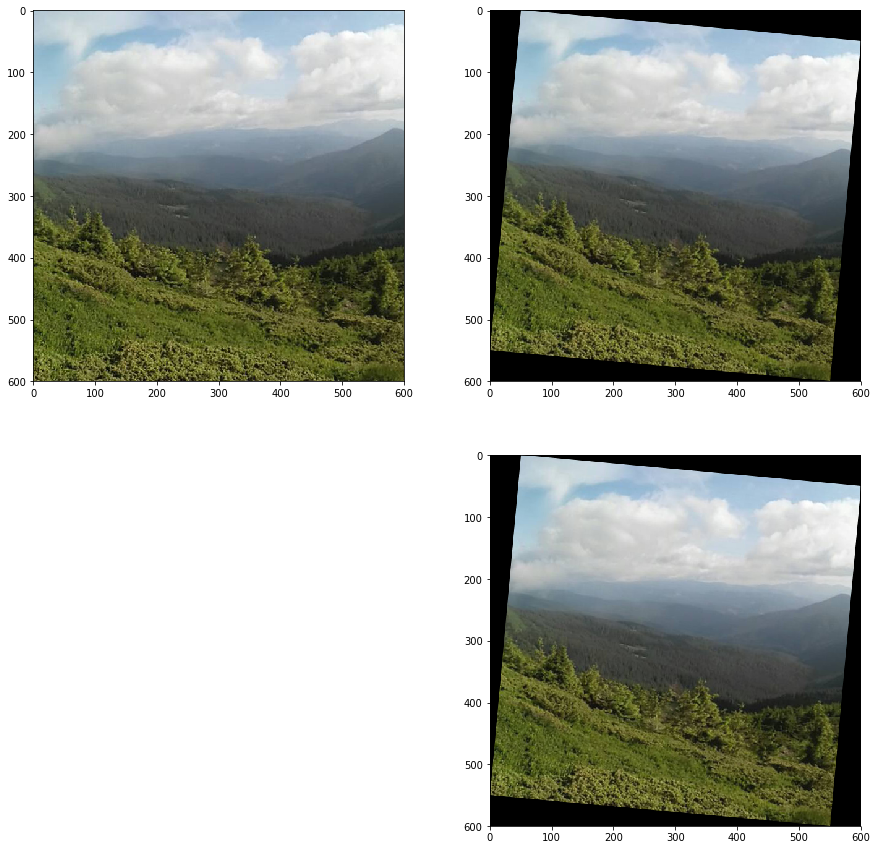

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(img[..., ::-1])
plt.subplot(2,2,2)
plt.imshow(dst[..., ::-1])
plt.subplot(2,2,4)
plt.imshow(dst_cv2[..., ::-1])